### 단축키 사용법
- ctrl + m + m : 마크다운 셀로 전환
- ctrl + m + y : 에딧(코드) 셀로 전환
- a, b : 위, 아래로 셀 추가
- ctrl + m + d : 셀 삭제
- ctrl + m + z : 삭제 된 셀 복구

## 딥러닝?
- 인간의 신경망을 모방하여, 학습 및 예측하고 판단하는 기술
- 영상 / 이미지(시각지능), 텍스트 / 음성(언어지능)

In [36]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# 작업 위치 조회
!pwd

/content/drive/My Drive/Colab Notebooks/esgc


In [38]:
# 작업 위치 변경
%cd /content/drive/MyDrive/Colab Notebooks/esgc

/content/drive/MyDrive/Colab Notebooks/esgc


In [39]:
!pwd

/content/drive/MyDrive/Colab Notebooks/esgc


### 목표
- TensorFlow Library를 활용해서, 학생의 수학 성적을 예측하는 모델 만들어보기
- 머신러닝과 딥러닝의 차이 확인

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
# 파일 에디터로 로드하기
data = pd.read_csv("./data/student-mat.csv", delimiter= ";")

In [42]:
data.info()

# 결측치는 없음

# studytime -> 문제데이터로 선정

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

| 컬럼 이름       | 설명                             |
|-----------------|----------------------------------|
| school          | 학교 (GP - Gabriel Pereira, MS - Mousinho da Silveira) |
| sex             | 성별 (F - Female, M - Male)      |
| age             | 나이                             |
| address         | 주소 유형 (U - Urban, R - Rural) |
| famsize         | 가족 크기 (LE3 - 3명 이하, GT3 - 3명 초과) |
| Pstatus         | 부모 동거 상태 (T - 함께, A - 별거) |
| Medu            | 어머니 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Fedu            | 아버지 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Mjob            | 어머니 직업 (teacher, health, services, at_home, other) |
| Fjob            | 아버지 직업 (teacher, health, services, at_home, other) |
| reason          | 학교 선택 이유 (home, reputation, course, other) |
| guardian        | 보호자 (mother, father, other)  |
| traveltime      | 통학 시간 (1 - 15분 이하, 2 - 15~30분, 3 - 30분~1시간, 4 - 1시간 초과) |
| studytime       | 주간 공부 시간 (1 - 2시간 이하, 2 - 2~5시간, 3 - 5~10시간, 4 - 10시간 초과) |
| failures        | 과목 낙제 수 (n if 1<=n<3, else 4) |
| schoolsup       | 학교 추가 지원 (yes, no)        |
| famsup          | 가족 추가 지원 (yes, no)        |
| paid            | 과외 수업 참여 (yes, no)        |
| activities      | 학교 외 활동 참여 (yes, no)     |
| nursery         | 유치원 참여 여부 (yes, no)      |
| higher          | 고등교육 희망 여부 (yes, no)    |
| internet        | 가정 내 인터넷 접속 여부 (yes, no) |
| romantic        | 로맨틱 관계 여부 (yes, no)      |
| famrel          | 가족 관계의 질 (1 - 매우 나쁨, 5 - 매우 좋음) |
| freetime        | 여가 시간의 양 (1 - 매우 적음, 5 - 매우 많음) |
| goout           | 외출 빈도 (1 - 매우 적음, 5 - 매우 많음) |
| Dalc            | 평일 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| Walc            | 주말 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| health          | 현재 건강 상태 (1 - 매우 나쁨, 5 - 매우 좋음) |
| absences        | 결석 일수                        |
| G1              | 1학기 성적                       |
| G2              | 2학기 성적                       |
| G3              | 최종 성적                        |


In [43]:
# 문제 데이터와 정답데이터 분리

X = data[['studytime']] # 문제(공부 시간, 2D 이상이여야 함)
y = data['G3'] # 정답(최종성적)

In [44]:
# 모양 확인
X.shape, y.shape

((395, 1), (395,))

In [45]:
# train, test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2025)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276, 1), (119, 1), (276,), (119,))

### 머신러닝과 딥러닝 비교
> 머신러닝(sklearn)
> - 클래스 임포트 -> 모델 생성(초기화) -> 학습 -> 예측 & 평가
> - 다양한 알고리즘들이 여러 클래스로 구현되어있음(완제품 로봇에 도색하는 느낌)

> 딥러닝(TensorFlow 기반)
> - 모델 설계(모델을 직접 구성) -> 학습 -> 예측 & 평가
> - 각각의 층을 직접 정의(이미 만들어진 층을 가져오기 가능)하고, 이를 조합( 레고로 만드는 조립식 로봇 느낌)
> - 직접 설계할 수 있으니, 유연성이 높음

### 머신러닝 모델링

In [47]:
# 일반 선형회귀 모델 호출
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # 함수명(실제값, 예측값)

# 모델 생성(초기화)
lr_model = LinearRegression()

# 학습
lr_model.fit(X_train, y_train)

# 예측값
y_pred = lr_model.predict(X_test)

# 평가
print('R2 값 : ', lr_model.score(X_test, y_test))
print('MSE 값 : ', mean_squared_error(y_test, y_pred))

R2 값 :  -0.029081838416823214
MSE 값 :  23.164188168213375


### 딥러닝 모델링(TensorFlow 기반)
1. 신경망 구조 설계
2. 학습 방법 설정
3. 학습
4. 예측 & 평가

In [48]:
from tensorflow.keras.models import Sequential # 뼈대
from tensorflow.keras.layers import InputLayer, Dense

# Dense(완전연결층) : 중간층(은닉층)과 출력층에 활용되는 층

In [61]:
# 1. 신경망 구조 설계

# 뼈대 생성
model = Sequential()

# 입력층 - 입력 모양을 정하는 역할
model.add(InputLayer(shape = (1,))) # 데이터 1개의 모양 지정

# 중간층
model.add(Dense(units = 64, activation= "sigmoid"))
# 유닛의 수 : 일반적인 경험으로는 "항아리 모양"이 Best

# 출력층 - 출력 모양을 정하는 역할
model.add(Dense(units= 1))

In [50]:
# 2. 학습 방법 설정 - 출력층에 따라 달라짐
model.compile(loss = "mean_squared_error", # 1. 오차 구하는 도구 -> 손실함수(loss function)
              optimizer = "SGD",           # 2. 최적화 함수(경사하강법 종류)
              metrics = ["mse"])           # 3. 최종 평가 지표 설정

In [51]:
# 3. 학습
h = model.fit(
    X_train, y_train,
    epochs= 20,                 # 학습 빈도수
    validation_split = 0.2)     # 매 학습 시 20%의 데이터셋은 검증용으로 활용

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 73.5470 - mse: 73.5470 - val_loss: 21.2045 - val_mse: 21.2045
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 19.4704 - mse: 19.4704 - val_loss: 20.9399 - val_mse: 20.9399
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 19.8307 - mse: 19.8307 - val_loss: 21.0000 - val_mse: 21.0000
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 20.5792 - mse: 20.5792 - val_loss: 20.9571 - val_mse: 20.9571
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 20.6482 - mse: 20.6482 - val_loss: 21.0666 - val_mse: 21.0666
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 19.1985 - mse: 19.1985 - val_loss: 22.0402 - val_mse: 22.0402
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 19.6979 - mse: 19.6979 - val_loss: 21.1778 - val_mse: 21.1778
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 16.0519 - mse: 16.0519 - val_loss: 21.4381 - val_mse: 21.4381
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step

In [53]:
# 4. 평가
model.evaluate(X_test, y_test) # sklearn의 score()랑 비슷

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 25.7250 - mse: 25.7250


[22.792573928833008, 22.792572021484375]

In [56]:
h.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

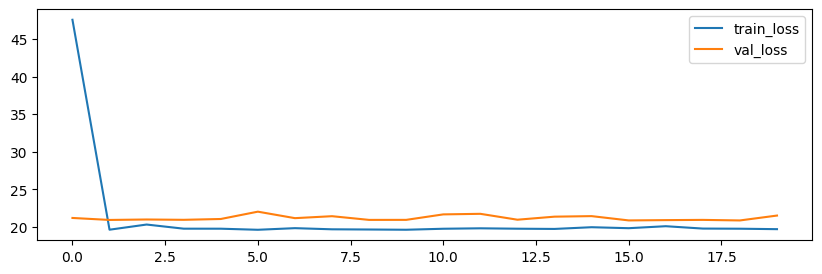

In [58]:
# 학습 결과 시각화
plt.figure(figsize = (10, 3))
plt.plot(h.history["loss"], label = "train_loss")
plt.plot(h.history["val_loss"], label = "val_loss")

plt.legend() # 범례표시

plt.show()

### 실습! 문제 데이터 4ea를 골라서 학습시키기

In [60]:
# studytime, traveltime, freetime, health
# + 은닉층의 개수도 2layer 이상 설계하여 학습 결과 시각화!

In [74]:
X_1 = data[['studytime', 'traveltime', 'freetime', 'health']]

X_1_train, X_1_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.3, random_state= 2025)

model2 = Sequential()

model2.add(InputLayer(shape=(4,)))

model2.add(Dense(units = 64, activation = "sigmoid"))
model2.add(Dense(units = 128, activation = "sigmoid"))
model2.add(Dense(units = 256, activation = "sigmoid"))
model2.add(Dense(units = 256, activation = "sigmoid"))
model2.add(Dense(units = 128, activation = "sigmoid"))
model2.add(Dense(units = 64, activation = "sigmoid"))

model2.add(Dense(units = 1))

model2.compile(loss = "mean_squared_error", optimizer = "SGD" , metrics = ["mse"] )

h = model2.fit(X_1_train, y_train, epochs = 20, validation_split = 0.2)

model2.evaluate(X_1_test, y_test)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 48.6265 - mse: 48.6265 - val_loss: 21.9197 - val_mse: 21.9197
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 20.5595 - mse: 20.5595 - val_loss: 22.1363 - val_mse: 22.1363
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 19.7552 - mse: 19.7552 - val_loss: 22.4050 - val_mse: 22.4050
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 19.2073 - mse: 19.2073 - val_loss: 21.8263 - val_mse: 21.8263
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 20.6949 - mse: 20.6949 - val_loss: 21.7121 - val_mse: 21.7121
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 21.4654 - mse: 21.4654 - val_loss: 22.5040 - val_mse: 22.5040
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 23.9085 - mse: 23.9085 - val_loss: 22.5253 - val_mse: 22.5253
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 18.1931 - mse: 18.1931 - val_loss: 21.6969 - val_mse: 21.6969
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/ste

[22.521615982055664, 22.521615982055664]

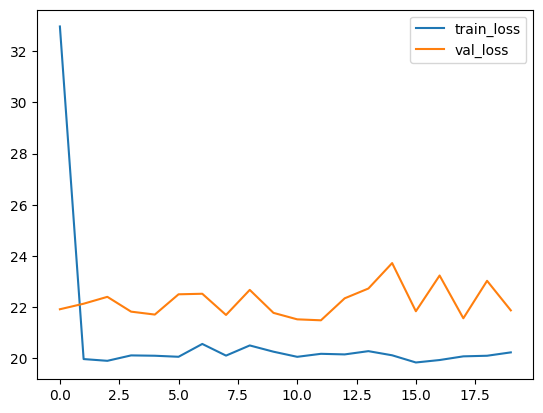

In [79]:
plt.plot(h.history["loss"], label = "train_loss")
plt.plot(h.history["val_loss"], label = "val_loss")

plt.legend()

plt.show()